In [23]:
import pandas as pd
import datetime
import seaborn as sms
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

import geopandas
import plotly.express as px

In [40]:
df = pd.read_csv('covid_19_data.csv',parse_dates=['Last Update'])

print(len(df.loc[(df['Country/Region']=="Canada")])) 


6528
           SNo ObservationDate Province/State Country/Region  \
31          32      01/22/2020     Washington             US   
70          71      01/23/2020     Washington             US   
119        120      01/24/2020     Washington             US   
120        121      01/24/2020        Chicago             US   
161        162      01/25/2020     Washington             US   
...        ...             ...            ...            ...   
285273  285274      05/02/2021       Virginia             US   
285283  285284      05/02/2021     Washington             US   
285286  285287      05/02/2021  West Virginia             US   
285288  285289      05/02/2021      Wisconsin             US   
285289  285290      05/02/2021        Wyoming             US   

               Last Update  Confirmed   Deaths  Recovered  
31     2020-01-22 17:00:00        1.0      0.0        0.0  
70     2020-01-23 17:00:00        1.0      0.0        0.0  
119    2020-01-24 17:00:00        1.0      0.0

In [42]:
test = df.groupby('Country/Region')['Deaths'].max().reset_index()
print(test.loc[test["Country/Region"]=="US"])

    Country/Region   Deaths
213             US  62078.0


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.


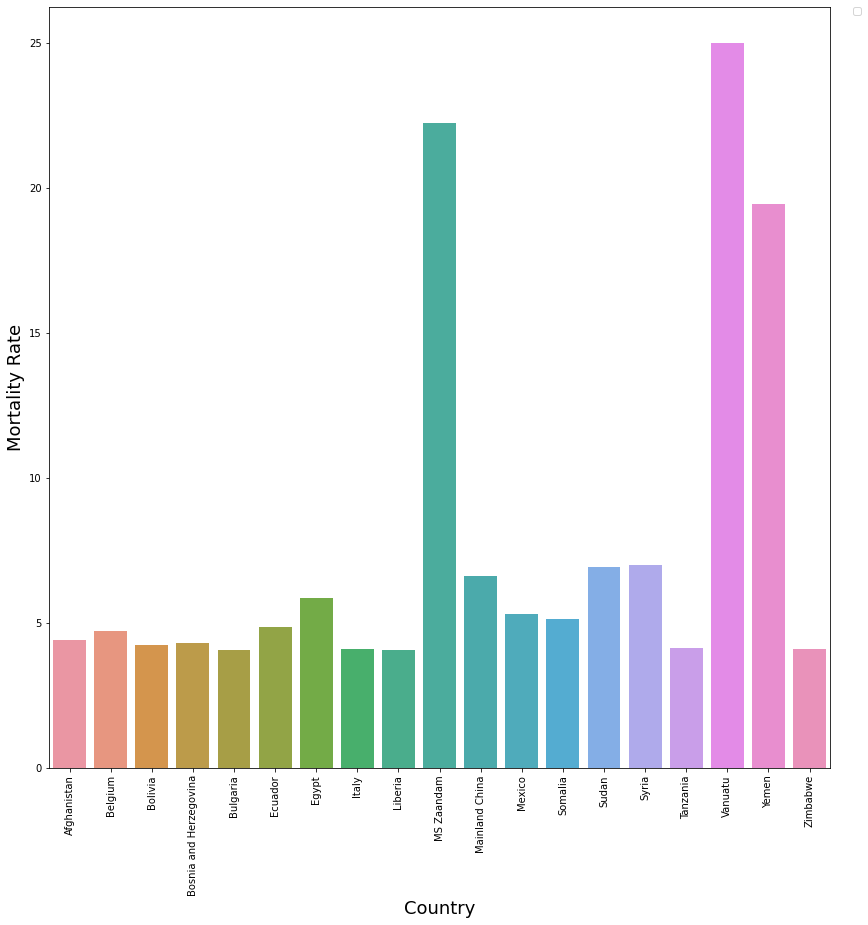

In [38]:
mortality = df.groupby('Country/Region')['Deaths'].max().reset_index()
confirmed = df.groupby('Country/Region')['Confirmed'].max().reset_index()

rate = pd.merge(left=mortality,right=confirmed, left_on='Country/Region', right_on='Country/Region')

rate = rate.loc[rate['Confirmed']>0]
rate = rate.loc[rate['Deaths']>0]
rate['mortality_rate'] = 100*rate['Deaths']/rate['Confirmed']
rate = rate.loc[rate['mortality_rate']>4]


fig, ax = plt.subplots(figsize=(14,14))
sms.barplot(rate['Country/Region'],rate['mortality_rate'])
plt.legend(bbox_to_anchor=(1.04,1), borderaxespad=0)
plt.xlabel("Country",fontsize=18)
plt.ylabel("Mortality Rate",fontsize=18)
plt.xticks(rotation=90)
plt.show()

In [39]:
country = df.groupby('Country/Region')['Deaths'].max().reset_index()
country = country.loc[country['Deaths']>=20000]
country['population'] = [44940000, 11460000, 211000000, 10650000, 67060000, 9773000, 1366000000, 270600000, 82910000, 60360000, 127600000, 32510000, 37970000, 19410000, 58560000, 46940000, 82000000, 66650000, 328200000]
country['Deaths'] = 100*country['Deaths']/country['population']
print(country.loc[country["Country/Region"]=="US"])


    Country/Region    Deaths  population
213             US  0.018915   328200000


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.


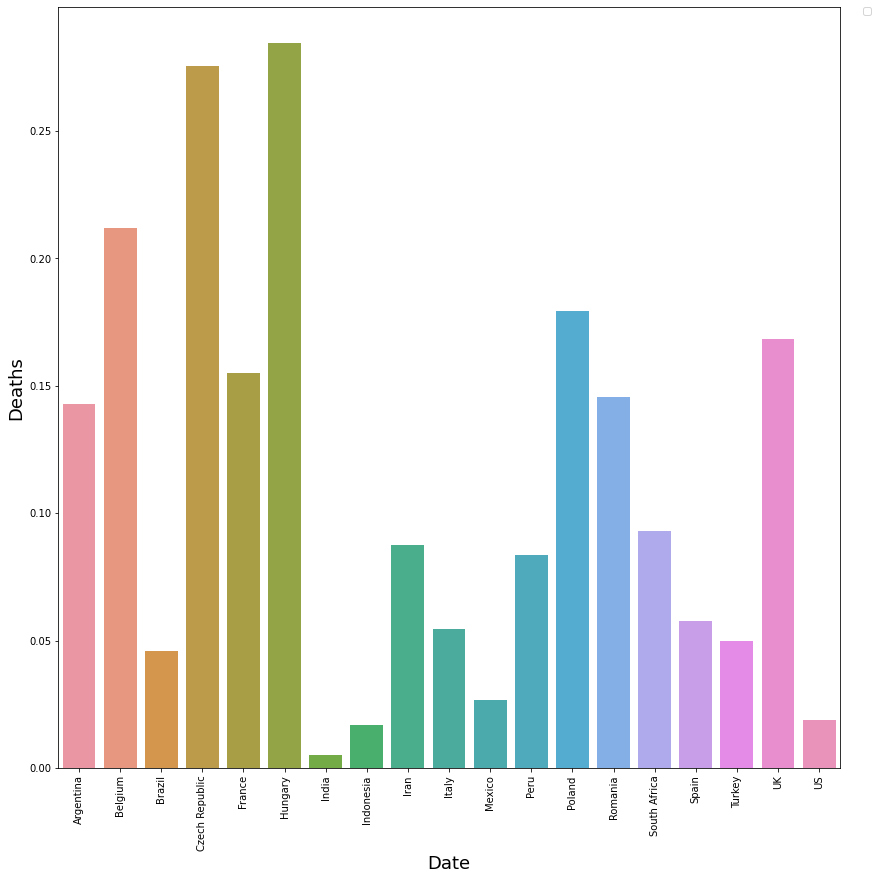

In [14]:
fig, ax = plt.subplots(figsize=(14,14))
sms.barplot(country['Country/Region'],country['Deaths'])
plt.legend(bbox_to_anchor=(1.04,1), borderaxespad=0)
plt.xlabel("Date",fontsize=18)
plt.ylabel("Deaths",fontsize=18)
plt.xticks(rotation=90)
plt.show()

In [3]:
can = df.loc[(df['Country/Region']=="Canada")]
can['Last Update'] = pd.to_datetime(can['Last Update'],utc=True)
print(can)

           SNo ObservationDate          Province/State Country/Region  \
219        220      01/26/2020                 Ontario         Canada   
266        267      01/27/2020                 Ontario         Canada   
318        319      01/28/2020                 Ontario         Canada   
319        320      01/28/2020        British Columbia         Canada   
371        372      01/29/2020                 Ontario         Canada   
...        ...             ...                     ...            ...   
285122  285123      05/02/2021    Prince Edward Island         Canada   
285133  285134      05/02/2021                  Quebec         Canada   
285140  285141      05/02/2021  Repatriated Travellers         Canada   
285173  285174      05/02/2021            Saskatchewan         Canada   
285297  285298      05/02/2021                   Yukon         Canada   

                     Last Update  Confirmed   Deaths  Recovered  
219    2020-01-26 16:00:00+00:00        1.0      0.0     

<ipython-input-3-9c9e1f163b7e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  can['Last Update'] = pd.to_datetime(can['Last Update'],utc=True)


In [4]:
can['Last Update'] = can['Last Update'].dt.date
date_before = datetime.date(2021, 4, 2)
can = can.loc[can['Last Update'] > date_before]

<ipython-input-4-ccebbd7351ee>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  can['Last Update'] = can['Last Update'].dt.date


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


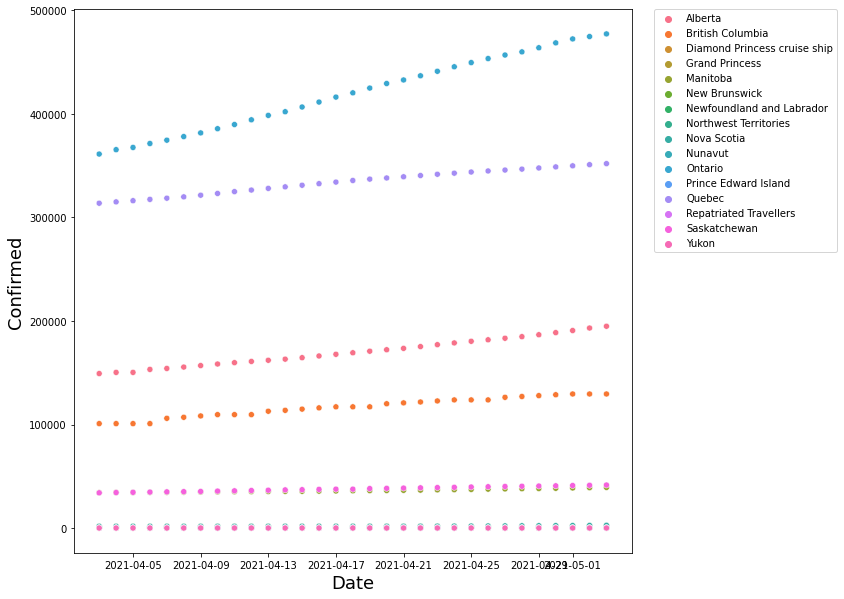

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


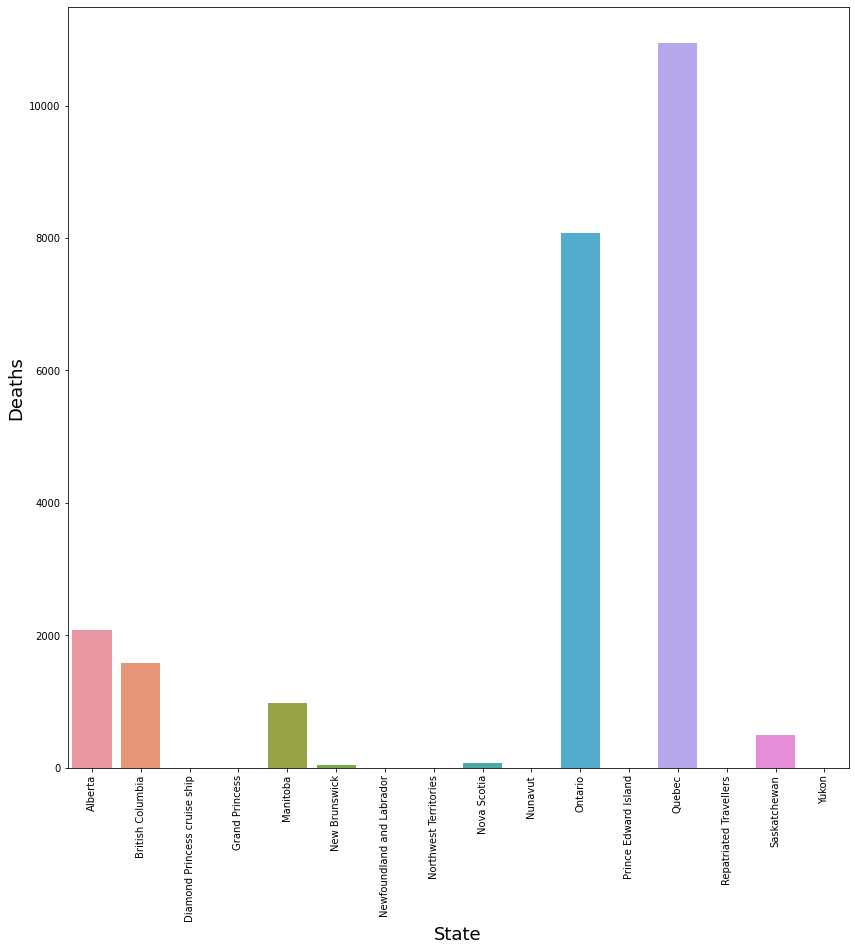

In [5]:
fig, ax = plt.subplots(figsize=(10,10))
sms.scatterplot(can['Last Update'],can['Confirmed'],hue=can['Province/State'])
plt.legend(bbox_to_anchor=(1.04,1), borderaxespad=0)
plt.xlabel("Date",fontsize=18)
plt.ylabel("Confirmed",fontsize=18)
plt.show()

deaths_c = can.groupby('Province/State')['Deaths'].max().reset_index()
fig, ax = plt.subplots(figsize=(14,14))
bar = sms.barplot(deaths_c['Province/State'],deaths_c['Deaths'])
plt.xlabel("State",fontsize=18)
plt.ylabel("Deaths",fontsize=18)
plt.xticks(rotation=90)
plt.show()

In [6]:
deaths_c

Province/State   Deaths
0                        Alberta   2086.0
1               British Columbia   1581.0
2   Diamond Princess cruise ship      1.0
3                 Grand Princess      0.0
4                       Manitoba    978.0
5                  New Brunswick     37.0
6      Newfoundland and Labrador      6.0
7          Northwest Territories      0.0
8                    Nova Scotia     67.0
9                        Nunavut      4.0
10                       Ontario   8070.0
11          Prince Edward Island      0.0
12                        Quebec  10942.0
13        Repatriated Travellers      0.0
14                  Saskatchewan    495.0
15                         Yukon      2.0

In [7]:
deaths_c = deaths_c.loc[(deaths_c['Province/State']!="Repatriated Travellers")&(deaths_c['Province/State']!="Grand Princess")&(deaths_c['Province/State']!="Diamond Princess cruise ship")]
deaths_c['population'] = [4436258,5153039,1380935, 782078, 520438, 45136, 979449, 39407, 14755211, 159819, 8575944, 1178832, 42192]
deaths_c['Deaths'] = 100*deaths_c['Deaths']/deaths_c['population']


<ipython-input-7-24312e955a19>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deaths_c['population'] = [4436258,5153039,1380935, 782078, 520438, 45136, 979449, 39407, 14755211, 159819, 8575944, 1178832, 42192]
<ipython-input-7-24312e955a19>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deaths_c['Deaths'] = 100*deaths_c['Deaths']/deaths_c['population']


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


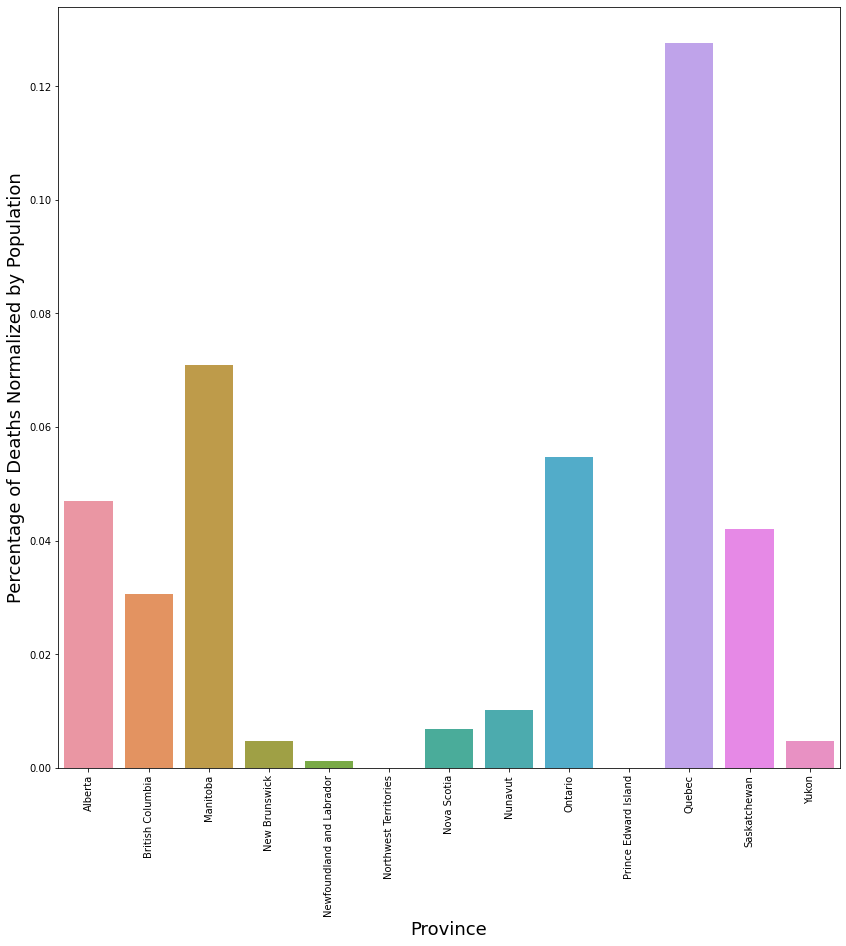

In [8]:
fig, ax = plt.subplots(figsize=(14,14))
bar = sms.barplot(deaths_c['Province/State'],deaths_c['Deaths'])
plt.xlabel("Province",fontsize=18)
plt.ylabel("Percentage of Deaths Normalized by Population",fontsize=18)
plt.xticks(rotation=90)
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285307 entries, 0 to 285306
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   SNo              285307 non-null  int64         
 1   ObservationDate  285307 non-null  object        
 2   Province/State   212318 non-null  object        
 3   Country/Region   285307 non-null  object        
 4   Last Update      285307 non-null  datetime64[ns]
 5   Confirmed        285307 non-null  float64       
 6   Deaths           285307 non-null  float64       
 7   Recovered        285307 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 17.4+ MB
None


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


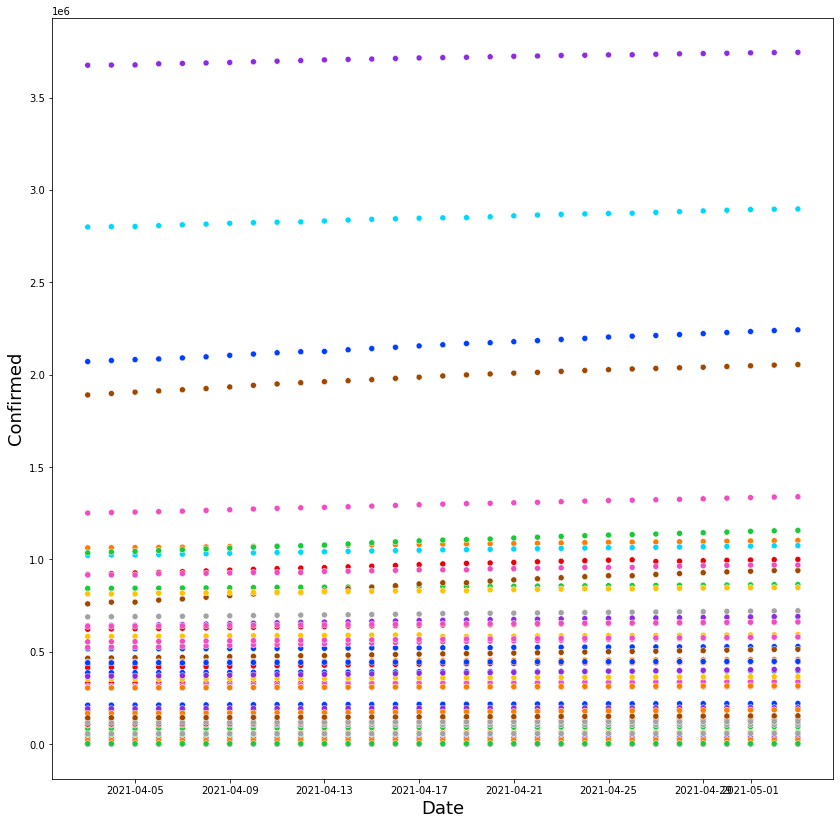

In [5]:
date_before = datetime.date(2021, 4, 2)
df_copy = df.copy()
print(df_copy.info())
df_copy['Last Update'] = df_copy['Last Update'].dt.date
us = df_copy.loc[(df_copy['Country/Region']=="US") & (df_copy['Last Update'] > date_before)]
fig, ax = plt.subplots(figsize=(14,14))
sms.scatterplot(us['Last Update'],us['Confirmed'],hue=us['Province/State'],palette = 'bright',legend=False)
plt.xlabel("Date",fontsize=18)
plt.ylabel("Confirmed",fontsize=18)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


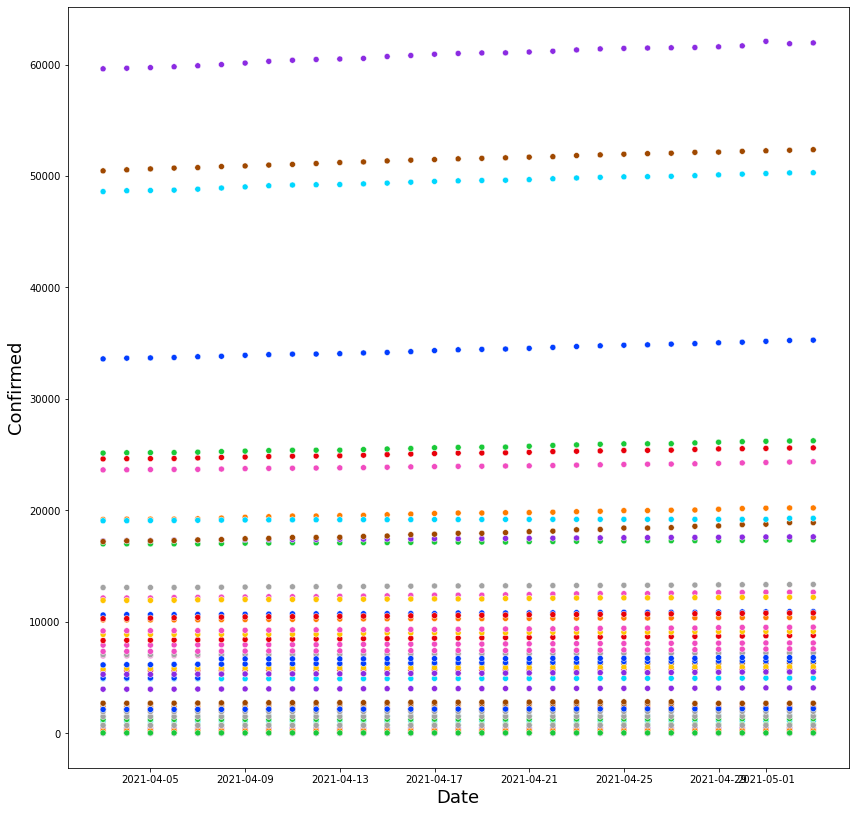

In [6]:
fig, ax = plt.subplots(figsize=(14,14))
sms.scatterplot(us['Last Update'],us['Deaths'],hue=us['Province/State'],palette = 'bright',legend=False)
plt.xlabel("Date",fontsize=18)
plt.ylabel("Confirmed",fontsize=18)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


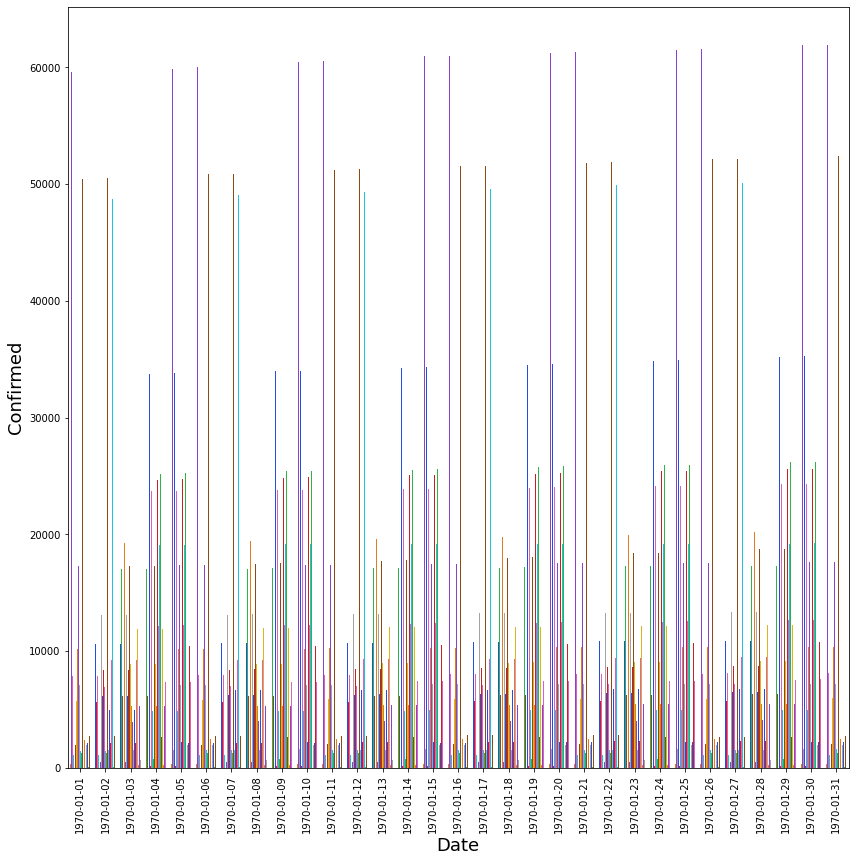

In [7]:
fig, ax = plt.subplots(figsize=(14,14))
bar = sms.barplot(us['Last Update'],us['Deaths'],hue=us['Province/State'],palette = 'bright')
bar.legend_.remove()
date_form = DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(date_form)
plt.xlabel("Date",fontsize=18)
plt.ylabel("Confirmed",fontsize=18)
plt.xticks(rotation=90)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


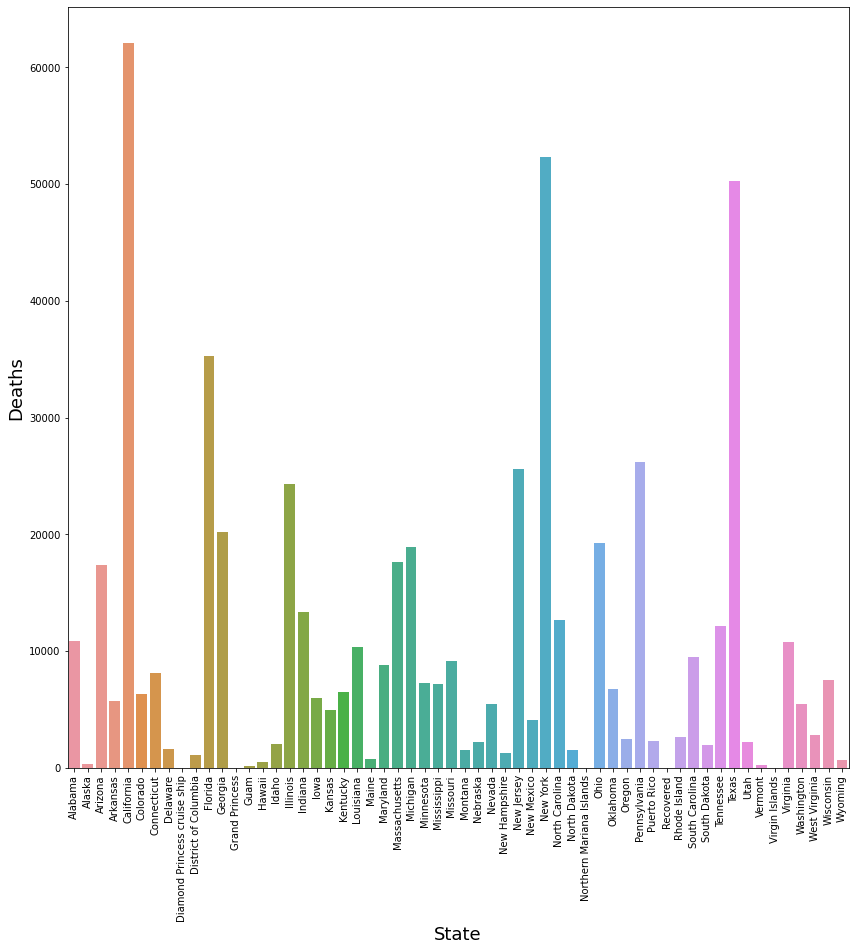

In [20]:
deaths = us.groupby('Province/State')['Deaths'].max().reset_index()
fig, ax = plt.subplots(figsize=(14,14))
bar = sms.barplot(deaths['Province/State'],deaths['Deaths'])
plt.xlabel("State",fontsize=18)
plt.ylabel("Deaths",fontsize=18)
plt.xticks(rotation=90)
plt.show()

<class 'geopandas.geodataframe.GeoDataFrame'>


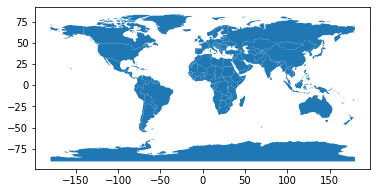

In [25]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.plot()
print(type(world))

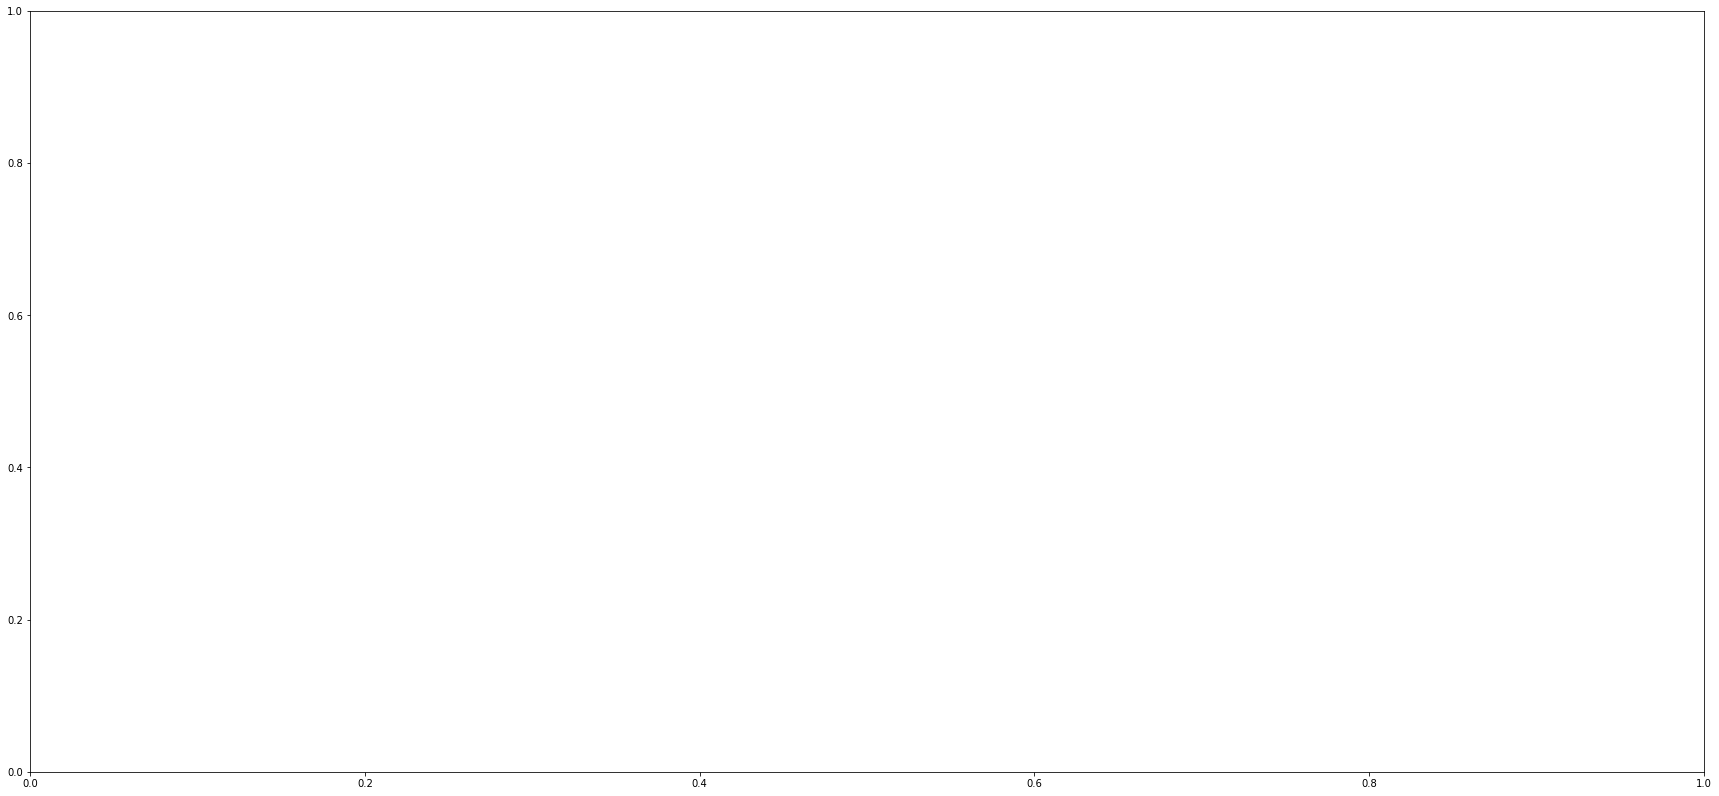

In [46]:
fig = plt.subplots(1, 1,figsize=(30,14))
world = world[(world.pop_est>0) & (world.name!="Antarctica")]
world.plot(column='pop_est', ax=ax, legend=True)
plt.show()

In [49]:
world = world.set_index('iso_a3')
world

pop_est      continent                      name  gdp_md_est  \
iso_a3                                                                   
FJI        920938        Oceania                      Fiji      8374.0   
TZA      53950935         Africa                  Tanzania    150600.0   
ESH        603253         Africa                 W. Sahara       906.5   
CAN      35623680  North America                    Canada   1674000.0   
USA     326625791  North America  United States of America  18560000.0   
...           ...            ...                       ...         ...   
SRB       7111024         Europe                    Serbia    101800.0   
MNE        642550         Europe                Montenegro     10610.0   
-99       1895250         Europe                    Kosovo     18490.0   
TTO       1218208  North America       Trinidad and Tobago     43570.0   
SSD      13026129         Africa                  S. Sudan     20880.0   

                                                 geometry  
iso_a3                                                     
FJI     MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  
TZA     POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
ESH     POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
CAN     MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  
USA     MULTIPOLYGON (((-122.84000 49.00000, -120.0000...  
...                                                   ...  
SRB     POLYGON ((18.82982 45.90887, 18.82984 45.90888...  
MNE     POLYGON ((20.07070 42.58863, 19.80161 42.50009...  
-99     POLYGON ((20.59025 41.85541, 20.52295 42.21787...  
TTO     POLYGON ((-61.68000 10.76000, -61.10500 10.890...  
SSD     POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...  

[176 rows x 5 columns]